In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from datetime import datetime


#import geopandas as gpd
#import geoplot as gplt
#import mapclassify
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import re
import seaborn as sns
#!pip3 install seaborn
from plotly.offline import plot
from plotly.graph_objs import *

In [18]:
df3 = pd.read_csv('Dataset3a_Datos_MercaMadrid.txt', delimiter='|', encoding ='utf-8', decimal=',')
df3.dtypes
df3.sample(10)

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen
56264,SANDIAS,SANDIA CON SEMILLA,MARRUECOS,kg,FRUTAS,2019,7,0.418824,0.28,0.55,349031
61487,TOMATES,TOMATE KUMATO,PORTUGAL,kg,HORTALIZAS,2018,8,1.061538,0.45,2.00,14010
61561,TOMATES,TOMATE KUMATO,SEVILLA,kg,HORTALIZAS,2019,2,1.060000,0.50,2.25,5745
36518,MANZANAS,MANZANAS STARKING,AUSTRIA,kg,FRUTAS,2020,6,1.490000,1.00,2.00,7525
18591,ESPARRAGOS,ESPARRAGO VERDE,PERU,kg,HORTALIZAS,2020,7,6.830000,2.33,10.00,71690
15432,CONGELADOS VEGETALES,CONGELADOS VEGEALES,ALMERIA,kg,HORTALIZAS,2019,3,0.000000,0.00,0.00,11200
41841,PAPAYOS,PAPAYA O.V.,ALMERIA,kg,FRUTAS,2018,10,2.890000,2.56,3.25,5570
36872,MANZANAS,MANZANAS STARKING,NAVARRA,kg,FRUTAS,2019,1,1.076471,0.75,1.25,22944
19360,FRAMBUESAS,FRAMBUESAS,LA CORUÃA,kg,FRUTAS,2019,12,10.000000,6.67,11.00,5000
40885,NARANJAS,NARANJA VALENCIA LATE,MALAGA,kg,FRUTAS,2020,4,1.030769,0.55,1.60,112723


In [19]:
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 67315 rows and 11 columns


In [20]:
df3['product'].unique()

array(['ACEITUNAS', 'ACELGAS', 'AGUACATES', 'AJOS', 'ALBARICOQUES',
       'ALCACHOFAS', 'ALPICOCES', 'APIO', 'AVELLANAS', 'BANANITOS',
       'BATATAS', 'BELLOTAS', 'BERENJENAS', 'BERROS', 'BONIATOS',
       'BORRAJAS', 'BREVAS', 'BROCOLI', 'CALABACINES', 'CALABAZAS',
       'CAQUIS', 'CARAMBOLA', 'CARDOS', 'CARLOTAS', 'CASTAÃ\x91AS',
       'CAÃ\x91A DE AZUCAR', 'CEBOLLAS', 'CEREZAS', 'CHAMPIÃ\x91ON',
       'CHIRIMOYAS', 'CHIRIVIAS', 'CIRUELAS', 'COCOS', 'COLES-REPOLLO',
       'COLIFLORES', 'CONGELADOS VEGETALES', 'CONSERVAS VEGETALES',
       'CUARTA GAMA FRUTAS', 'CUARTA GAMA HORT.', 'DATILES',
       'ELABORADOS VEGETALES', 'ENDIVIAS', 'ESCAROLAS', 'ESPARRAGOS',
       'ESPINACAS', 'FISALIS', 'FRAMBUESAS', 'FRESONES', 'FRESQUILLAS',
       'FRUTA DE LA PASION', 'FRUTOS SECOS', 'GARROFON', 'GRANADAS',
       'GRELOS', 'GROSELLA', 'GUAYABOS', 'GUINDILLAS', 'GUISANTES',
       'HABAS VERDES', 'HIGO CHUMBO', 'HIGOS', 'HINOJO', 'JENGIBRE',
       'JUDIAS VERDES', 'KIWI', 'KUNKUAT', '

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67315 entries, 0 to 67314
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     67315 non-null  object 
 1   variedad    67315 non-null  object 
 2   origen      67315 non-null  object 
 3   Unidad      67315 non-null  object 
 4   familia     67315 non-null  object 
 5   YEAR        67315 non-null  int64  
 6   MONTH       67315 non-null  int64  
 7   price_mean  67315 non-null  float64
 8   price_min   67315 non-null  float64
 9   price_max   67315 non-null  float64
 10  Volumen     67315 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 5.6+ MB


In [22]:
df3['origen'].unique()

array(['ALMERIA', 'BADAJOZ', 'BARCELONA', 'CACERES', 'CADIZ',
       'CIUDAD REAL', 'CORDOBA', 'GRANADA', 'JAEN', 'MADRID', 'MALAGA',
       'MURCIA', 'SEVILLA', 'TOLEDO', 'VALENCIA', 'VALLADOLID',
       'ALBACETE', 'ALICANTE', 'AVILA', 'BURGOS', 'CANTABRIA',
       'CASTELLON', 'CUENCA', 'FRANCIA', 'HUELVA', 'LA CORUÃ\x91A',
       'LA RIOJA', 'LEON', 'LERIDA', 'NAVARRA', 'ORENSE', 'PONTEVEDRA',
       'PORTUGAL', 'SEGOVIA', 'TARRAGONA', 'VIZCAYA', 'ZARAGOZA',
       'BRASIL', 'CHILE', 'COLOMBIA', 'COSTA DE MARFIL', 'COSTA RICA',
       'ECUADOR', 'GUATEMALA', 'ISRAEL', 'ITALIA', 'KENIA', 'LAS PALMAS',
       'MARRUECOS', 'MEJICO', 'PERU', 'REPUBLICA DOMINICANA', 'SUDAFRICA',
       'HUESCA', 'GERONA', 'GUIPUZCOA', 'LUGO', 'ZAMORA', 'TERUEL',
       'ASTURIAS', 'ALAVA', 'BELGICA', 'HOLANDA', 'ESTADOS UNIDOS',
       'HONDURAS', 'BALEARES', 'SALAMANCA', 'SORIA', 'GUADALAJARA',
       'IRLANDA', 'PALENCIA', 'ARGENTINA', 'CHINA',
       'OTROS PAIS.ASIATICOS', 'TAILANDIA', 'CANADA', 'GR

In [23]:
df3['origen'].unique()
#internacionales= ['FRANCIA','ITALIA', 'ALEMANIA','CHILE', 'CHINA', 'ECUADOR', 'MARRUECOS', 'OTROS AMERICA', 'USA',  
#                  'BRASIL', 'CANADA', 'COLOMBIA', 'COSTA MARFIL', 'GRAN BRETAÑA', 'HOLANDA', 'KENIA', 'MEJICO', 
#                  'OCEANIA', 'OTROS AFRICA', 'PORTUGAL', 'SUDAFRICA', 'SUIZA', 'ARGENTINA',
#                  'LUXEMBURGO', 'TURQUIA', 'BELGICA', 'COSTA RICA', 'DINAMARCA', 'TUNEZ', 'ISRAEL',
#                  'TAILANDIA', 'NUEVA ZELANDA', 'OTROS ASIA', 'ANDORRA', 'GRECIA','IRLANDA', 
#                  'URUGUAY', 'OTROS EUROPA',
#                 'AUSTRIA', 'CUBA', 'SUECIA', 'CAMERUN', 'ISLANDIA','COREA']

internacionales = ['BRASIL', 'CHILE', 'COLOMBIA', 'COSTA DE MARFIL', 'COSTA RICA',
 'ECUADOR', 'GUATEMALA', 'ISRAEL', 'ITALIA', 'KENIA', 'MARRUECOS', 'MEJICO', 'PERU', 'REPUBLICA DOMINICANA',   
 'SUDAFRICA', 'BELGICA', 'HOLANDA', 'ESTADOS UNIDOS', 'IRLANDA', 'ARGENTINA', 'CHINA', 'HONDURAS', 'OTROS PAIS.ASIATICOS',
 'TAILANDIA', 'CANADA', 'GRAN BRETAÃ\x91A', 'PORTUGAL',
 'GRECIA', 'TURQUIA', 'OTROS PAIS.AFRICANOS','VIETNAM', 'POLONIA',
 'ALEMANIA', 'DINAMARCA', 'ARGELIA', 'TÃ\x9aNEZ','INDIA',
 'NUEVA ZELANDA', 'PANAMA', 'URUGUAY', 'STA.CRUZ DE TENERIFE',
 'VENEZUELA', 'AUSTRALIA', 'AUSTRIA', 'SUIZA', 'SENEGAL','BULGARIA', 'EGIPTO', 'CAMERUN', 'INDONESIA',
 'CUBA', 'ANGOLA','OTROS P.SUDAMERICANO', 'OTROS PAIS. EUROPEOS' ]

def intern(x):
    for i in internacionales :
        if x == i:
            return 'si'
    return 'no'
        
df3['Internacionales'] = df3['origen'].map(intern) 
df3.sample(15)

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen,Internacionales
9773,CEBOLLAS,CEBOLLA TIERNA,ALMERIA,kg,HORTALIZAS,2019,3,1.024375,0.70,1.80,14035,no
66727,ZANAHORIAS,ZANAHORIAS O CARLOTA NANT,AVILA,kg,HORTALIZAS,2018,5,0.700000,0.60,0.75,3080,no
47227,PATATAS,PATATA ROJA,PONTEVEDRA,kg,PATATAS,2020,10,0.530000,0.51,0.56,1470,no
4473,CALABACINES,CALABACIN VERDE,ALMERIA,kg,HORTALIZAS,2020,6,0.569231,0.30,1.00,858061,no
52428,PIMIENTOS,PIMIENTOS LAMUYOS,MURCIA,kg,HORTALIZAS,2020,6,1.578846,0.75,2.25,325033,no
22924,JUDIAS VERDES,JUDIA VERDE BOBY,NAVARRA,kg,HORTALIZAS,2019,1,3.500000,3.20,5.00,50,no
23629,JUDIAS VERDES,JUDIAS VERDES GARRAFAL,GRANADA,kg,HORTALIZAS,2019,11,3.500000,1.50,5.00,6888,no
61371,TOMATES,TOMATE KUMATO,MURCIA,kg,HORTALIZAS,2018,1,1.095833,0.40,2.30,293109,no
35401,MANZANAS,MANZANAS GOLDEN,ITALIA,kg,FRUTAS,2018,12,1.046667,0.40,1.50,124283,si
48242,PERAS,PERA MAGALLON,NAVARRA,kg,FRUTAS,2019,6,1.775000,1.25,2.00,4493,no


In [24]:
groupIntern = df3.groupby(['Internacionales'])
groupIntern['price_mean'].mean()

Internacionales
no    1.606312
si    1.688417
Name: price_mean, dtype: float64

In [25]:
groupIntern['Volumen'].mean()

Internacionales
no     81296.004743
si    126263.129855
Name: Volumen, dtype: float64

<AxesSubplot:xlabel='Internacionales'>

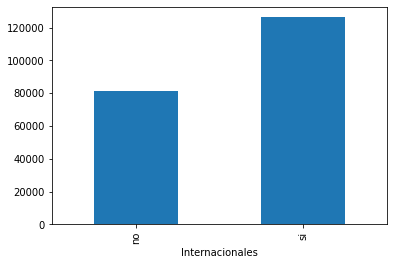

In [26]:
groupIntern.mean()["Volumen"].plot(kind='bar')

<AxesSubplot:xlabel='Internacionales'>

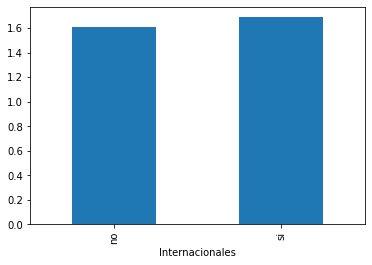

In [27]:
groupIntern.mean()["price_mean"].plot(kind='bar')

In [28]:
df3['Fecha'] = (df3['MONTH'].astype(str) + "/" + df3['YEAR'].astype(str))
df3

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen,Internacionales,Fecha
0,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,2,3.46,3.31,3.61,6700,no,2/2018
1,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,4,3.46,3.31,3.61,400,no,4/2018
2,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,5,3.46,3.31,3.61,260,no,5/2018
3,ACEITUNAS,ACEITUNAS,BADAJOZ,kg,FRUTAS,2018,4,3.46,3.31,3.61,24060,no,4/2018
4,ACEITUNAS,ACEITUNAS,BARCELONA,kg,ULTRAMARINO,2019,2,0.00,0.00,0.00,1000,no,2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67310,ÃAME O YAME,YAME O ÃAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,2020,6,1.50,1.38,1.80,5220,si,6/2020
67311,ÃAME O YAME,YAME O ÃAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,2020,8,1.50,1.38,1.80,2340,si,8/2020
67312,ÃAME O YAME,YAME O ÃAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,2020,9,1.50,1.38,1.80,4340,si,9/2020
67313,ÃAME O YAME,YAME O ÃAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,2020,10,1.50,1.38,1.80,3564,si,10/2020


In [29]:
df3= df3.sort_values(by = "Fecha")
df3.head(2)

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen,Internacionales,Fecha
17143,ELABORADOS VEGETALES,ELABORADOS VEGETALES,BARCELONA,kg,HORTALIZAS,2018,1,0.0000,0.0,0.0,1000,no,1/2018
35714,MANZANAS,MANZANAS GOLDEN,TERUEL,kg,FRUTAS,2018,1,1.0125,0.5,1.8,123285,no,1/2018


In [30]:
df3['Fecha'] = df3['Fecha'].map(lambda x : datetime.strptime(x, '%m/%Y'))

In [31]:
g2018= df3.loc[df3['Fecha'] <  "2019-01-01"]
g2019= df3[(df3['Fecha'] > '2018-12-01') & (df3['Fecha'] < '2020-01-01')]
g2020= df3.loc[df3['Fecha'] >  "2019-12-01"]

In [32]:
g2018.groupby(['product'])['price_mean'].mean().plot()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-32-271b9c84ab89>, line 1)

In [33]:
nectarinas2018 = g2018[g2018['product'] == 'NECTARINAS']
nectarinas2018.head(5)

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen,Internacionales,Fecha
41509,NECTARINAS,NECTARINA IMPORTACION,ALICANTE,kg,FRUTAS,2018,1,3.50,3.50,5.0,22000,no,2018-01-01
41510,NECTARINAS,NECTARINA IMPORTACION,CHILE,kg,FRUTAS,2018,1,2.75,2.50,3.0,3000,si,2018-01-01
41534,NECTARINAS,NECTARINA NACIONAL,ALMERIA,kg,FRUTAS,2018,10,1.20,0.75,1.5,8600,no,2018-10-01
41550,NECTARINAS,NECTARINA NACIONAL,CASTELLON,kg,FRUTAS,2018,10,1.20,0.75,1.5,18920,no,2018-10-01
41560,NECTARINAS,NECTARINA NACIONAL,HUELVA,kg,FRUTAS,2018,10,1.20,0.75,1.5,11700,no,2018-10-01


In [34]:
nectarinas2020 = g2020[g2020['product'] == 'NECTARINAS']
nectarinas2020.head(5)

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen,Internacionales,Fecha
41264,NECTARINAS,NECTARINA CARNE AMARILLA,ALICANTE,kg,FRUTAS,2020,10,1.350000,0.5,1.8,6750,no,2020-10-01
41438,NECTARINAS,NECTARINA CARNE AMARILLA,ZARAGOZA,kg,FRUTAS,2020,10,1.216667,0.5,1.8,35990,no,2020-10-01
41343,NECTARINAS,NECTARINA CARNE AMARILLA,HUESCA,kg,FRUTAS,2020,10,1.500000,0.5,1.8,2850,no,2020-10-01
41306,NECTARINAS,NECTARINA CARNE AMARILLA,CASTELLON,kg,FRUTAS,2020,10,1.200000,1.0,1.8,7000,no,2020-10-01
41285,NECTARINAS,NECTARINA CARNE AMARILLA,BADAJOZ,kg,FRUTAS,2020,10,1.166667,1.0,1.8,40600,no,2020-10-01


In [44]:
nectarinas2020['precio_total_medio'] = (nectarinas2020['Volumen'] * nectarinas2020['price_mean'])
nectarinas2018['precio_total_medio'] = (nectarinas2018['Volumen'] * nectarinas2018['price_mean'])

<ipython-input-44-1d8e886b1bff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-1d8e886b1bff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Fecha'>

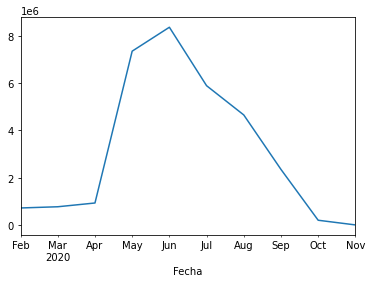

In [50]:
nectarinas2020.groupby(['Fecha'])['precio_total_medio'].sum().plot()

<AxesSubplot:xlabel='Fecha'>

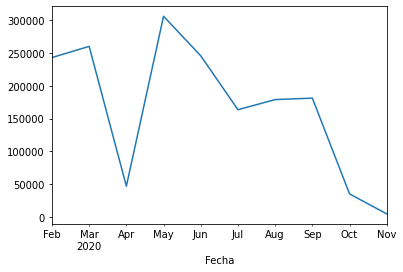

In [52]:
nectarinas2020.groupby(['Fecha'])['precio_total_medio'].mean().plot()

<AxesSubplot:xlabel='Fecha'>

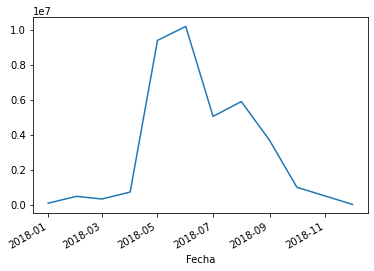

In [51]:
nectarinas2018.groupby(['Fecha'])['precio_total_medio'].sum().plot()

<AxesSubplot:title={'center':'2020'}, xlabel='Fecha'>

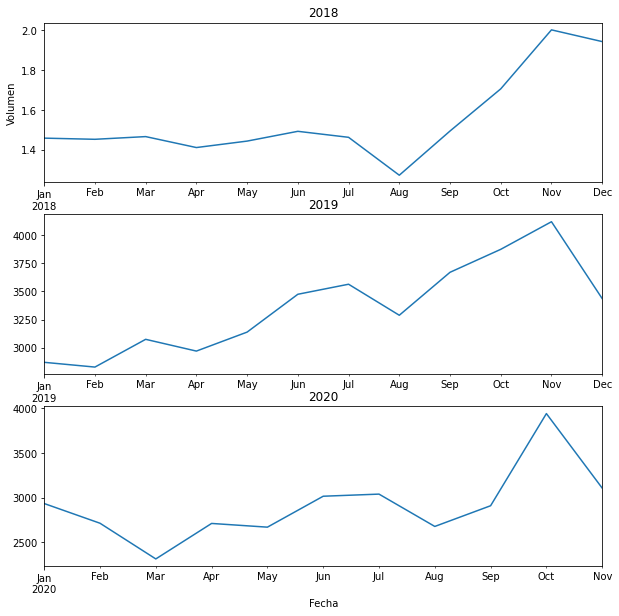

In [40]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.subplot(3, 1, 1) # Gráfica 1 de un total de 2x2 gráficas
plt.title('2018')
plt.ylabel('Volumen')
g2018.groupby(['Fecha'])['price_mean'].mean().plot()

plt.subplot(3, 1, 2) # Gráfica 2 de un total de 2x2 gráficas
plt.title('2019')
g2019.groupby(['Fecha'])['price_mean'].sum().plot()

plt.subplot(3, 1, 3) # Gráfica 3 de un total de 2x2 gráficas
plt.title('2020')
g2020.groupby(['Fecha'])['price_mean'].sum().plot()
